In [ ]:
# module imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# model imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from matplotlib.pyplot import figure

In [ ]:
df = pd.read_csv('dataset_sdn.csv')
df.columns


Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

In [ ]:
df.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


**Feature extraction**


In [ ]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
object_df = df.select_dtypes(include=['object'])
numeric_cols = numeric_df.columns
object_cols = object_df.columns
df = df.dropna(axis = 0, how = 'any')

print(numeric_cols)
print(object_cols)


df.columns



Index(['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps',
       'tot_kbps', 'label'],
      dtype='object')
Index(['src', 'dst', 'Protocol'], dtype='object')


Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

In [ ]:
labels = []

In [ ]:
y = df['label']

df['label'] = df.label.astype(float)
clm = list(y)




def map_attack(value):

  if value['label'] == 1.0:
    return 'Malicious'
  else:
    return 'Benign'

df['attack_flag'] = df.apply(lambda value: map_attack(value),axis=1)

df.columns

numeric_df = df.select_dtypes(include=['int64', 'float64'])
object_df = df.select_dtypes(include=['object'])

object_df = pd.to_numeric

df[100:2000]


<ipython-input-6-22dff66266de>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df.label.astype(float)


,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label,attack_flag
100,11335,1,10.0.0.1,10.0.0.8,4777,5092282,10,711000000,1.071100e+10,3,...,0,UDP,2,3929,53230984,0,3838.0,3838.0,1.0,Malicious
101,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,0,UDP,1,3775,1492,0,0.0,0.0,0.0,Benign
102,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,0,UDP,2,3845,1402,0,0.0,0.0,0.0,Benign
103,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,0,UDP,3,3413,3665,0,0.0,0.0,0.0,Benign
104,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,0,UDP,1,3775,1242,0,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,11755,2,10.0.0.10,10.0.0.8,110012,114632504,380,759000000,3.810000e+11,2,...,0,UDP,2,4022,1472,0,0.0,0.0,1.0,Malicious
1996,11755,2,10.0.0.10,10.0.0.8,110012,114632504,380,759000000,3.810000e+11,2,...,0,UDP,3,3842,3590,0,0.0,0.0,1.0,Malicious
1997,11755,2,10.0.0.10,10.0.0.8,110012,114632504,380,759000000,3.810000e+11,2,...,0,UDP,2,3590,3842,0,0.0,0.0,1.0,Malicious
1998,11755,2,10.0.0.10,10.0.0.8,110012,114632504,380,759000000,3.810000e+11,2,...,0,UDP,1,3972,1312,0,0.0,0.0,1.0,Malicious


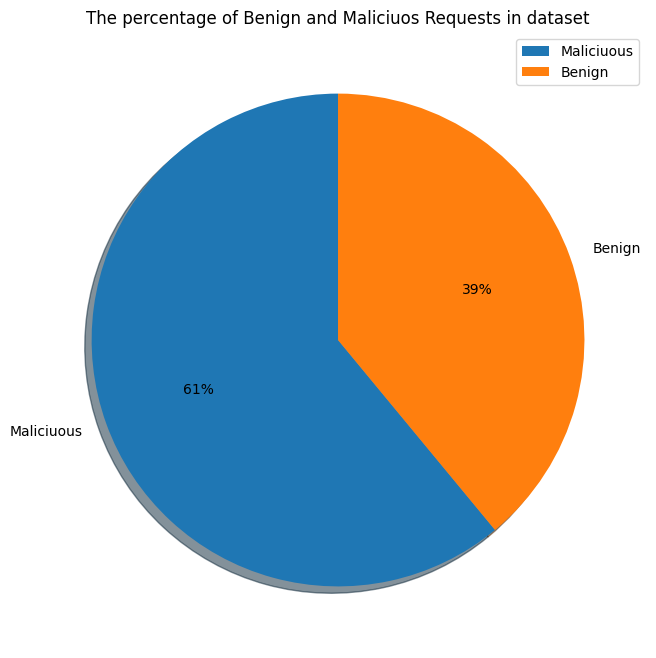

In [ ]:
labels = ["Maliciuous",'Benign']
sizes = [dict(df.label.value_counts())[0], dict(df.label.value_counts())[1]]
plt.figure(figsize = (13,8))
plt.pie(sizes, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=90)
plt.legend(["Maliciuous", "Benign"])
plt.title('The percentage of Benign and Maliciuos Requests in dataset')
plt.show()


Text(0.5, 1.0, 'Number of all reqests')

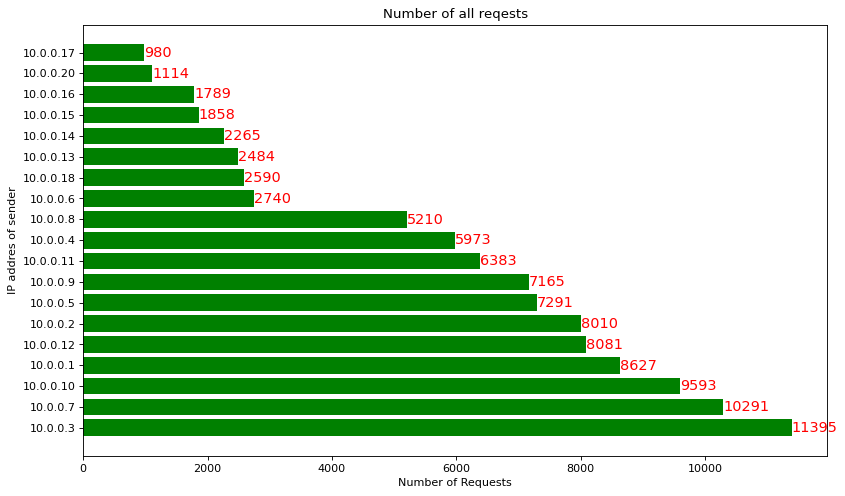

In [ ]:
figure(figsize=(12, 7), dpi=80)
plt.barh(list(dict(df.src.value_counts()).keys()), dict(df.src.value_counts()).values(), color='green')

for idx, val in enumerate(dict(df.src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='r', size = 13)

plt.xlabel('Number of Requests')
plt.ylabel('IP addres of sender')
plt.title('Number of all reqests')

In [ ]:
import numpy

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# encoder = OrdinalEncoder()

feature_type = ['dt', 'switch', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow',  'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps']

labels =['label','src','dst','Protocol']

# creating instance of one-hot-encoder
enc = OrdinalEncoder()
# # passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(df[feature_type]))
enc_df1 = pd.DataFrame(enc.fit_transform(df[labels]))

# # merge with main df bridge_df on key values
# df = df.join(enc_df[18])
# df = df.join(enc_df1[3])

df.head
# X = df.drop(df['label'])
# Y = df['label']
Y = df[labels]
# X = df[feature_type]
# Y = np.arange(-1,1)

X_train, X_test, y_train, y_test = train_test_split(enc_df, enc_df1[3], random_state=42, test_size=0.25)
# y_test[0:50]
enc_df.shape
# enc_df1.shape

(103839, 19)

In [ ]:
enc_df.shape

(103839, 19)

In [ ]:
from sklearn import linear_model
# model = linear_model.Lasso(alpha = 0.1)
# model.fit(X_train,y_train)

classifier = RandomForestClassifier(max_depth=2, n_estimators=30,
    min_samples_split=3, max_leaf_nodes=5,
    random_state=22).fit(X_train,y_train)



predicter = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
# score = confusion_matrix(y_test,predicter)
rf_score = accuracy_score(predicter,y_test)
print(rf_score*100)


92.14175654853621


In [ ]:
print(classifier.score(X_train,y_train) * 100)

92.41644088907151


Blending

In [ ]:
# train__x, val_x, train_y, val_y,=train_test_split(x_train,y_train, strartify=y_train, test_size=0.2, random_state=0 )

In [ ]:
from sklearn import svm
classifier1=SVC(kernel='sigmoid', gamma='auto')
classifier1.fit (X_train[0:5000], y_train[0:5000])
pred = classifier1.predict(X_test)
svm_score = accuracy_score(pred,y_test)
print(svm_score * 100)

39.314329738058554


In [ ]:
 from sklearn.neighbors import KNeighborsClassifier
 classifier2=KNeighborsClassifier(n_neighbors=5)
 classifier2.fit (X_train, y_train)
 pred = classifier2.predict(X_test)
 knn_score = accuracy_score(pred,y_test)
 print(knn_score * 100)

99.43759630200309


In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier3=GaussianNB()
classifier3.fit (X_train, y_train)
pred = classifier3.predict(X_test)
nb_score = accuracy_score(pred,y_test)
print(nb_score * 100)


90.96302003081664


In [ ]:
X_train = X_train.dropna(axis = 0, how = 'any')
y_train = y_train.dropna(axis = 0, how = 'any')
train_x,val_x,train_y,val_y = train_test_split(X_train,y_train,stratify = y_train,test_size = 0.25)
train_x.shape
# val_x.shape

(58409, 19)

In [ ]:
model2 = KNeighborsClassifier(n_neighbors = 5)

model2.fit(train_x,train_y)
y_val_pred2 = model2.predict(val_x)
y_val_pred2 = pd.DataFrame(y_val_pred2)
y_test_pred2 = model2.predict(X_test)
y_test_pred2 = pd.DataFrame(y_test_pred2)

In [ ]:
model3 = GaussianNB()
model3.fit(train_x,train_y)
y_val_pred3 = model3.predict(val_x)
y_val_pred3 = pd.DataFrame(y_val_pred3)
y_test_pred3 = model3.predict(X_test)
y_test_pred3 = pd.DataFrame(y_test_pred3)

In [ ]:
columns1 = enc_df.columns
val_input = pd.concat([pd.DataFrame(val_x,columns = columns1),y_val_pred2,y_val_pred3,y_val_pred3],axis = 1)
test_input = pd.concat([pd.DataFrame(X_test,columns = columns1),y_test_pred2,y_test_pred3,y_test_pred3],axis = 1)


In [ ]:
#print(val_input)
columns = enc_df.columns

In [ ]:
#print(val_y)

In [ ]:
val_input = val_input.dropna(axis = 0, how = 'any')
test_input = test_input.dropna(axis = 0, how = 'any')

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 200)
# val_input.values.reshape(748,107)
val_y.values.reshape(330,59)
model.fit(val_input[0:3608],val_y[0:3608])
val_input.shape
val_y.shape

(19470,)

In [ ]:
y_test.values.reshape(440,59)
test_input.values.reshape(1613,88)
test_input.shape
y_test.shape
# print(model.score(test_input[0:6452],y_test[0:6452])*100,'%')
print(model.score(val_input[0:3608],val_y[0:3608])*100,'%')

99.029933481153 %


<Axes: >

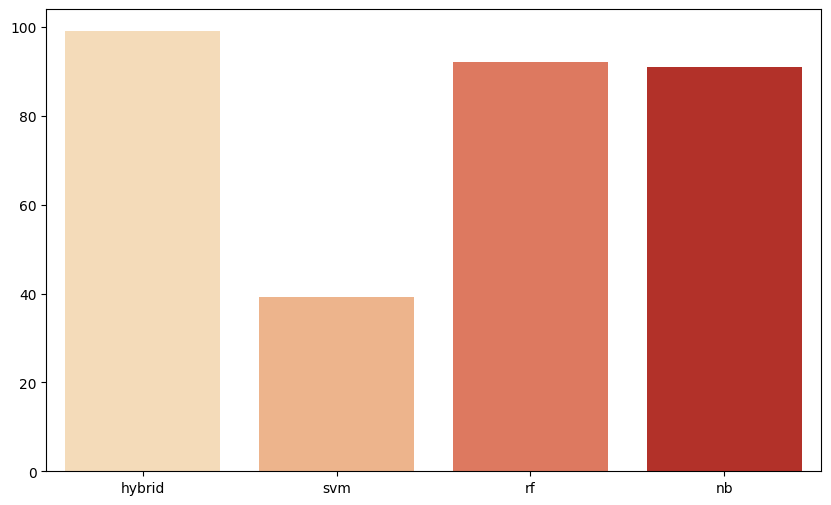

In [ ]:
hybrid_res = model.score(val_input[0:3608],val_y[0:3608])
final_res= {'hybrid':hybrid_res*100, 'svm':svm_score*100,'rf':rf_score*100,'nb':nb_score*100}
k = ['hybrid','svm','rf','knn','nb']
import seaborn as sns

courses = list(final_res.keys())
values = list(final_res.values())
# courses.append(values)
# final_res.sort()

# res = pd.DataFrame(final_res)

plt.figure(figsize=(10,6))
sns.barplot(x=courses, y=values, palette='OrRd')